In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
data = {
    'Customer': ['A', 'B', 'C', 'D', 'E', 'F'],
    'X': [1, 2, 3, 8, 9, 10],  
    'Y': [2, 1, 4, 8, 10, 8]   
}
df = pd.DataFrame(data)

In [3]:
df

,Customer,X,Y
0,A,1,2
1,B,2,1
2,C,3,4
3,D,8,8
4,E,9,10
5,F,10,8


In [6]:
kmeans = KMeans(n_clusters=2, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['X', 'Y']])

C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
df

,Customer,X,Y,Cluster
0,A,1,2,1
1,B,2,1,1
2,C,3,4,1
3,D,8,8,0
4,E,9,10,0
5,F,10,8,0


In [8]:
wcss = []
for k in range(1, 7):
    kmeans_temp = KMeans(n_clusters=k, random_state=0)
    kmeans_temp.fit(df[['X', 'Y']])
    wcss.append(kmeans_temp.inertia_)

C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Text(0, 0.5, 'WCSS')

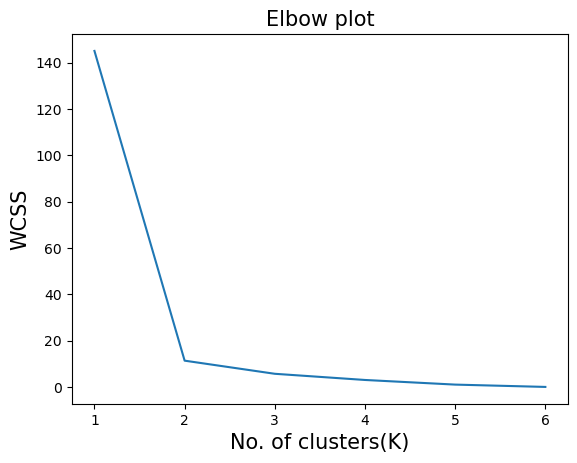

In [9]:
plt.plot(range(1,7), wcss)

plt.xticks(np.arange(1,7,1))

plt.title('Elbow plot', fontsize=15)
plt.xlabel('No. of clusters(K)', fontsize=15)
plt.ylabel('WCSS', fontsize=15)

### Hence optimal value of K is 2 

## Optimal Value of K using Silhouette Score

In [14]:
n_clusters = [2,3,4,5]
silhouette = []
from sklearn.metrics import silhouette_score

for K in n_clusters:
    cluster = KMeans(n_clusters = K, random_state=10)
    predict = cluster.fit_predict(df[['X', 'Y']])
    score = silhouette_score(df[['X', 'Y']], predict, random_state= 10)
    silhouette.append(score)
    print("For {} clusters the silhoutte score is {}".format(K,score))

C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For 2 clusters the silhoutte score is 0.7499492988842156


C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For 3 clusters the silhoutte score is 0.5326286911126935


C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For 4 clusters the silhoutte score is 0.21065533708336845


C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BusinessComputersin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For 5 clusters the silhoutte score is 0.17546440075000702


<BarContainer object of 4 artists>

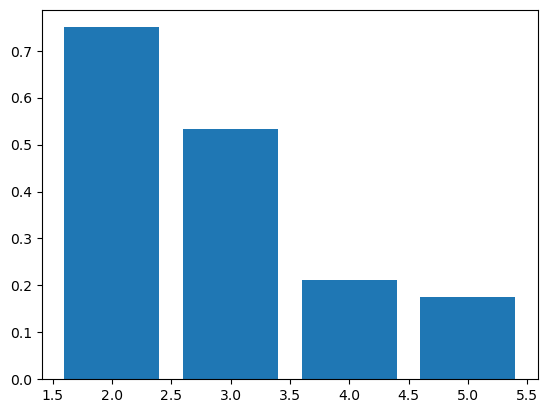

In [16]:
#visualize using bar plot
plt.bar(range(2,6), silhouette)

### Larger Silhouette Score better is the value of K hence k =2

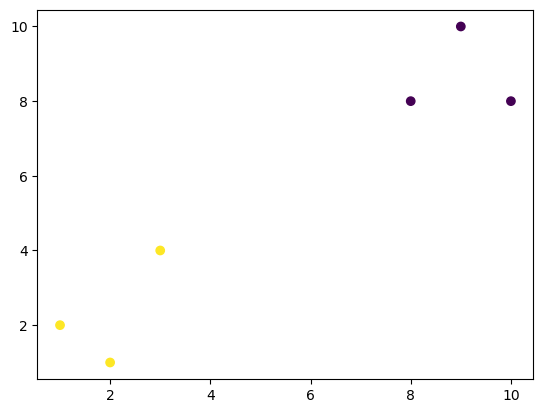

In [17]:
plt.scatter(df['X'],df['Y'],c=df['Cluster'])